In [102]:
#prototype

#dictionary
#diNT_PWM[position][dinucleotide] --> value

# make a dictionary of the csv file
#first test
import csv

diNT_csv_dictionary = {}

#opens csv file, reads into a dictionary
with open('diNTpwm_fordict.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        diNT_csv_dictionary[row['dinucleotide'], row['position']] = row['efficiency']

  

# below code is for scoring viral seq with dint pwm

In [121]:
#1 ,  2,  3,  4,  5,  6, 7
#-6, -5, -4, -3, -2, -1, +4, +5

#have to scan through each dinucleotide position in seq
#get the efficiency and multiply together
#save into table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO


# 30_ATG_rest

TIS_list = []
#get the sequence out of the fasta file # should start at 24 until 35
for seq_record in SeqIO.parse("finalviral.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    TIS_list.append(seq_record.seq[24:35].transcribe())

def PWM(dinucleotide, position):
    #convert efficiency into float
    return float(diNT_csv_dictionary[dinucleotide, position])

In [122]:
seq_dint_tuple_list = []
for i in range(len(TIS_list)):

    for j in range(0,5):
        seq_dint_tuple_list.append((str(TIS_list[i][j:j+2]), j+1))

    # add dint position 6
    seq_dint_tuple_list.append((TIS_list[i][5]+TIS_list[i][9], 6))


    # add dint position 7
    seq_dint_tuple_list.append((TIS_list[i][9]+TIS_list[i][10], 7))
    


In [123]:
#first index is 0 to 6
#2nd index is from 0 to 1

#have to accumulate every 7 PWMs

PWM_diNT_scores_seq = []
for i in range(len(seq_dint_tuple_list)):
    PWM_diNT_scores_seq.append(PWM(seq_dint_tuple_list[i][0], str(seq_dint_tuple_list[i][1])))



    
    
list_of_tuples_by_seven = [PWM_diNT_scores_seq[x:x+7] for x in range(0, len(PWM_diNT_scores_seq),7)]



In [124]:

# # have to multiply every 7 indices
    
import operator
import functools

PWM_scores_seq = []
for i in range(len(list_of_tuples_by_seven)):
    PWM_scores_seq.append(functools.reduce(operator.mul, list_of_tuples_by_seven[i], 7))



In [125]:
#convert to pandas series to easily manipulate
pandas_PWM_scores_viral = pd.Series(PWM_scores_seq)

import math
final_data_viral = pandas_PWM_scores_viral*math.exp(4.602730)

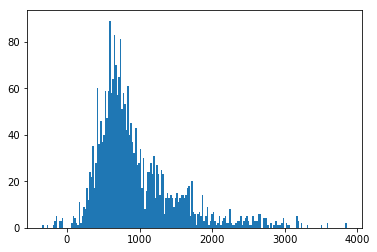

In [8]:
plt.hist(final_data_viral, bins = 200)
plt.show()

# Below code is for generating dint pwm scores for human seq

In [103]:
#1 ,  2,  3,  4,  5,  6, 7
#-6, -5, -4, -3, -2, -1, +4, +5

#have to scan through each dinucleotide position in seq
#get the efficiency and multiply together
#save into table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO


# 30_ATG_rest

TIS_list = []
#get the sequence out of the fasta file # should start at 24 until 35
for seq_record in SeqIO.parse("hs_all_nodup_u36.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    TIS_list.append(seq_record.seq.upper()[30:41].transcribe())



In [104]:
def PWM(dinucleotide, position):
    #convert efficiency into float
    return float(diNT_csv_dictionary[dinucleotide, position])

In [105]:
seq_dint_tuple_list = []
for i in range(len(TIS_list)):

    for j in range(0,5):
        seq_dint_tuple_list.append((str(TIS_list[i][j:j+2]), j+1))

    # add dint position 6
    seq_dint_tuple_list.append((TIS_list[i][5]+TIS_list[i][9], 6))


    # add dint position 7
    seq_dint_tuple_list.append((TIS_list[i][9]+TIS_list[i][10], 7))
    


In [106]:
#first index is 0 to 6
#2nd index is from 0 to 1

#have to accumulate every 7 PWMs

PWM_diNT_scores_seq = []
for i in range(len(seq_dint_tuple_list)):
    PWM_diNT_scores_seq.append(PWM(seq_dint_tuple_list[i][0], str(seq_dint_tuple_list[i][1])))



    
    
list_of_tuples_by_seven = [PWM_diNT_scores_seq[x:x+7] for x in range(0, len(PWM_diNT_scores_seq),7)]



In [107]:

# # have to multiply every 7 indices
    
import operator
import functools

PWM_scores_seq = []
for i in range(len(list_of_tuples_by_seven)):
    PWM_scores_seq.append(functools.reduce(operator.mul, list_of_tuples_by_seven[i], 7))



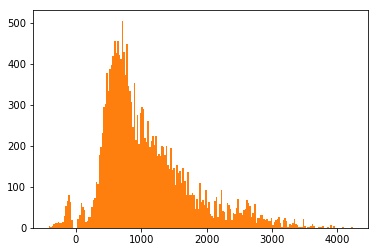

In [109]:
#convert to pandas series to easily manipulate
pandas_PWM_scores_human = pd.Series(PWM_scores_seq)

import math
final_data_human = pandas_PWM_scores_human*math.exp(4.602730)

plt.hist(final_data_human, bins = 200)
plt.show()

# attempting to draw both on same graph

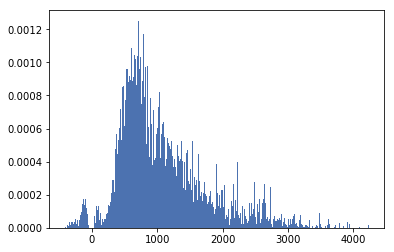

In [183]:
import numpy as np
import matplotlib.pyplot as plt

x = final_data_human
y = final_data_viral

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(x, 500, normed=True)
fig.canvas.draw()
plt.show()

# density distribution of both viral and human seq scored by dint pwm

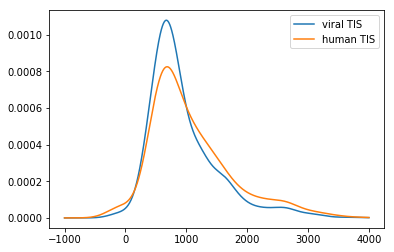

In [131]:
#plots densities of the efficiencies

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

data_human = final_data_human

density_human = gaussian_kde(data_human)


data_viral = final_data_viral

density_viral = gaussian_kde(data_viral)


xs = np.linspace(-1000,4000,2000)

density_viral.covariance_factor = lambda : .25

density_viral._compute_covariance()


density_human.covariance_factor = lambda : .25

density_human._compute_covariance()


plt.plot(xs,density_viral(xs), label = "viral TIS")
plt.plot(xs,density_human(xs), label = "human TIS")
plt.legend()
plt.show()

#human

In [129]:
SAVETHISVIRAL = final_data_viral
SAVETHISHUMAN = final_data_human

# attempt to randomize human TIS and score

In [110]:
#TODO
# randomized human TIS from Ho
# scramble TIS for each seq

from Bio import SeqIO
TIS_list = []
#get the sequence out of the fasta file # should start at 24 until 35
for seq_record in SeqIO.parse("hs_all_nodup_u36.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    TIS_list.append(seq_record.seq.upper()[30:41].transcribe())



#FIX FASTA ANNOTATOR
#run it on plant viruses



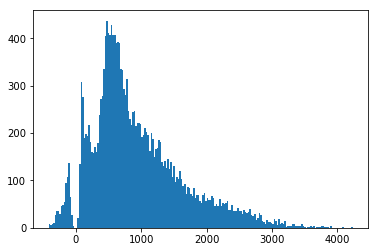

In [115]:
#rerun to get more random seq
import numpy
import random
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import generic_rna

shuffled_TIS_list =[]

for each in TIS_list:
    TIS_only = str(each[0:6] + each[9:11])
    
    #shuffles a string
    shuffled_TIS_source_string = ''.join(random.sample(TIS_only,len(TIS_only)))

    
    shuffled_record = Seq(shuffled_TIS_source_string[0:6] + "AUG" + shuffled_TIS_source_string[6:8], 
            generic_rna)
    shuffled_TIS_list.append(shuffled_record)


    
    
    
seq_dint_tuple_list = []
for i in range(len(shuffled_TIS_list)):

    for j in range(0,5):
        seq_dint_tuple_list.append((str(shuffled_TIS_list[i][j:j+2]), j+1))

    # add dint position 6
    seq_dint_tuple_list.append((shuffled_TIS_list[i][5]+TIS_list[i][9], 6))


    # add dint position 7
    seq_dint_tuple_list.append((shuffled_TIS_list[i][9]+TIS_list[i][10], 7))
    

    
    #first index is 0 to 6
#2nd index is from 0 to 1

#have to accumulate every 7 PWMs

PWM_diNT_scores_seq = []
for i in range(len(seq_dint_tuple_list)):
    PWM_diNT_scores_seq.append(PWM(seq_dint_tuple_list[i][0], str(seq_dint_tuple_list[i][1])))



    
    
list_of_tuples_by_seven = [PWM_diNT_scores_seq[x:x+7] for x in range(0, len(PWM_diNT_scores_seq),7)]





# # have to multiply every 7 indices
    
import operator
import functools

PWM_scores_seq = []
for i in range(len(list_of_tuples_by_seven)):
    PWM_scores_seq.append(functools.reduce(operator.mul, list_of_tuples_by_seven[i], 7))


    
import pandas as pd
import matplotlib.pyplot as plt
#convert to pandas series to easily manipulate
pandas_PWM_scores_human = pd.Series(PWM_scores_seq)

import math
shuffled_human = pandas_PWM_scores_human*math.exp(4.602730)

plt.hist(shuffled_human, bins = 200)
plt.show()
#looks the same


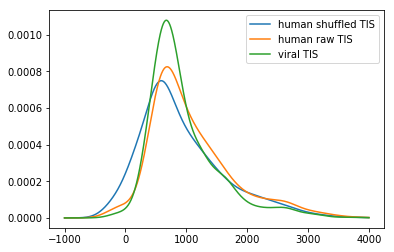

In [132]:
#plots densities of the efficiencies

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

data_human = final_data_human

density_human = gaussian_kde(data_human)


data_hum_shuffled = shuffled_human

density_hum_shuffled = gaussian_kde(data_hum_shuffled)


xs = np.linspace(-1000,4000,2000)

density_hum_shuffled.covariance_factor = lambda : .25

density_hum_shuffled._compute_covariance()


density_human.covariance_factor = lambda : .25

density_human._compute_covariance()


plt.plot(xs,density_hum_shuffled(xs), label = "human shuffled TIS")
plt.plot(xs,density_human(xs), label = "human raw TIS")
plt.plot(xs,density_viral(xs), label = "viral TIS")

plt.legend()
plt.show()
#human